<font size="6" color="#0068b2"  face="cambria"> <B> Analysis of internet speed measured over two days</B></font>

<font size="3" color="#000000"  face="cambria">  Data is gathered to test my internet speed over two days from 2 June 2020 to 4 June 2020. Variables to test are download speed, upload speed, and ping. These are the independent variables for this test being measured against the experiment running time (the dependent variable).
    
***09/07/2020*** Graphs done - analysis to follow

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
from matplotlib.collections import LineCollection

In [27]:
# Extract data from csv file to Pandas DataFrame.
df = pd.read_csv(r'C:\Users\fergi\Documents\data entry csv.csv')

# Remove NaN values.
df = df.dropna(axis='columns')

# Echo DataFrame.
df

,Day,clock time,running time/mins,time/days,Download speed/Mbps,Upload speed/Mbps,Ping/ms
0,2/06/2020,1900,0,0.000000,20.57,9.59,31
1,2/06/2020,2018,78,0.054167,30.49,9.68,10
2,2/06/2020,2136,156,0.108333,21.41,9.53,5
3,2/06/2020,2254,234,0.162500,29.31,9.61,17
4,3/06/2020,12,312,0.216667,29.94,9.63,19
5,3/06/2020,230,450,0.312500,30.21,9.67,12
6,3/06/2020,430,570,0.395833,30.55,9.71,14
7,3/06/2020,700,720,0.500000,27.40,9.64,16
8,3/06/2020,900,840,0.583333,23.92,9.65,15
9,3/06/2020,1000,900,0.625000,22.69,9.50,16


In [28]:
# Create NumPy 2D array from Pandas DataFrame.
arr = pd.DataFrame.to_numpy(df.T)

# Echo array.
arr

array([['2/06/2020', '2/06/2020', '2/06/2020', '2/06/2020', '3/06/2020',
        '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020',
        '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020',
        '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020', '3/06/2020',
        '4/06/2020', '4/06/2020', '4/06/2020', '4/06/2020', '4/06/2020',
        '4/06/2020', '4/06/2020', '4/06/2020', '4/06/2020', '4/06/2020',
        '4/06/2020', '4/06/2020', '4/06/2020'],
       [1900, 2018, 2136, 2254, 12, 230, 430, 700, 900, 1000, 1118, 1236,
        1354, 1512, 1630, 1748, 1906, 2024, 2142, 2300, 18, 230, 430,
        700, 900, 954, 1112, 1230, 1348, 1506, 1624, 1742, 1900],
       [0, 78, 156, 234, 312, 450, 570, 720, 840, 900, 978, 1056, 1134,
        1212, 1290, 1368, 1446, 1524, 1602, 1680, 1758, 1890, 2010, 2160,
        2280, 2334, 2412, 2490, 2568, 2646, 2724, 2802, 2880],
       [0.0, 0.054166667, 0.108333333, 0.1625, 0.21666666699999998,
        0.3125, 0.395833332

In [29]:
# Extract relevant 1D arrays with required data from arr and convert to data type 'float 64' to avoid errors in data mapping.
clock_time = arr[1].astype('float64')
time_days = arr[3].astype('float64')
d_speed = arr[4].astype('float64')
u_speed = arr[5].astype('float64')
ping = arr[6].astype('float64')

In [30]:
# Segment parameter in lineCollection(segment) requires a 3d object of shape (N, 2, 2). E.g.: 
# [ [[1,1],[1,1]] ] is (1, 2, 2). 
# [ [[1,1],[1,1]] ] , [ [[1,1],[1,1]] ] is (2, 2, 2), and so on.

# A function is made here for best practice and for reuseability. Parameters 'independent' and 'dependent' represent the
# discrete data points of the independent and dependent variables respectively.
def segments(independent , dependent):
    
    array2d = []
    list_tuples = []  
    
    for i in range( 0 , len(independent) ):
        list_tuples.append( (independent[i] , dependent[i]) )
    
    for i in range( 1 , len(list_tuples)):
        array2d.append( [ list_tuples[i-1] , list_tuples[i] ] )
    
    return np.array(array2d)

# Call segment to test with independent and dependent variables time_days and d_speed respectively. Dependent variables can also
# be u_speed or ping. 
segments(time_days , d_speed)

array([[[ 0.        , 20.57      ],
        [ 0.05416667, 30.49      ]],

       [[ 0.05416667, 30.49      ],
        [ 0.10833333, 21.41      ]],

       [[ 0.10833333, 21.41      ],
        [ 0.1625    , 29.31      ]],

       [[ 0.1625    , 29.31      ],
        [ 0.21666667, 29.94      ]],

       [[ 0.21666667, 29.94      ],
        [ 0.3125    , 30.21      ]],

       [[ 0.3125    , 30.21      ],
        [ 0.39583333, 30.55      ]],

       [[ 0.39583333, 30.55      ],
        [ 0.5       , 27.4       ]],

       [[ 0.5       , 27.4       ],
        [ 0.58333333, 23.92      ]],

       [[ 0.58333333, 23.92      ],
        [ 0.625     , 22.69      ]],

       [[ 0.625     , 22.69      ],
        [ 0.67916667, 24.08      ]],

       [[ 0.67916667, 24.08      ],
        [ 0.73333333, 20.68      ]],

       [[ 0.73333333, 20.68      ],
        [ 0.7875    , 30.56      ]],

       [[ 0.7875    , 30.56      ],
        [ 0.84166667, 31.12      ]],

       [[ 0.84166667, 31.12      ],
  

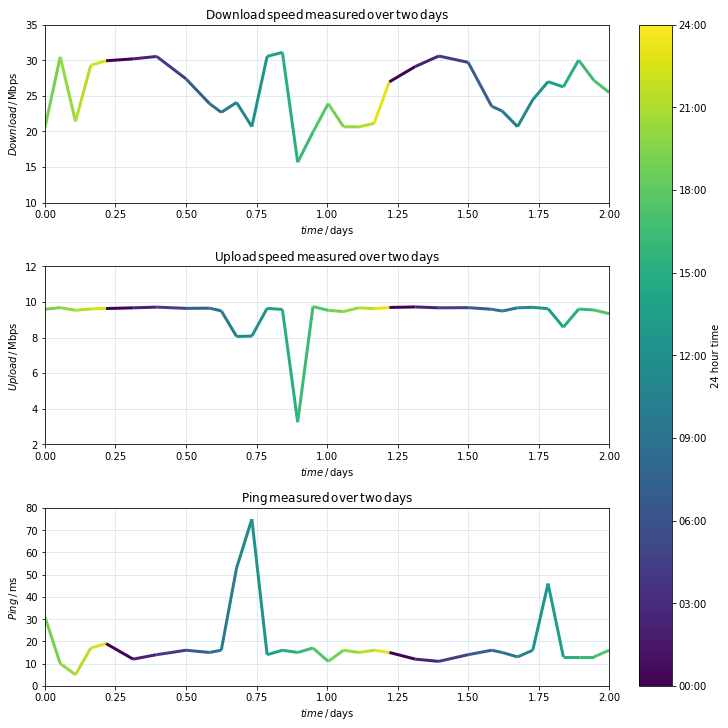

In [31]:
#### General procedure to create multi-coloured lines ####


### PART 1 - Define figure and axes for plotting.

# Unpack subplots tuple into fig and axs for ease of plot creation. Function syntax is plt.subplots(*Nrows* , *Mcolumns*, ...).
# Syntax may be 'ax' or 'axs' for the creation of subplot axes. Axs means two or more subplots. Individual subplots are
# called by using index notation - axs[0], axs[1], etc.
# Figsize tuple is measured in inches.
# Constrained_layer parameter avoids overlapping subplots.
fig, axs = plt.subplots(3,1, figsize=(10,10), constrained_layout = True)


### PART 2 - Create normalised array for colour mapping.

# Data used for colour map must be normalised. In other words, the data must be adjusted into a common scale or range. E.g.:
# the list [2,3,4,1] is normalised to [1,2,3,4] for a range of 1 to 4. This is so the colour map can assign colours to values
# incrementally. We wish to use the 24 hour clock time for our colour map, this must be normalised as [0,...,2400].
# Note: clock_time.min() = 12, clock_time.max() = 2300.
norm = plt.Normalize(clock_time.min()-12,clock_time.max()+100)


#### PART 3 - Multi-coloured line creation for plotting.

## FIRST GRAPH.

# Segments parameter is the discrete data of the independent and dependent variables for plotting.
# Cmap parameter is the colour map we wish to use to represent 24 hour time on the line (refer documentation).
# Norm parameter inserts the normalised clock_time data for the independent variable of segment (time_days) to map.
lc = LineCollection(segments = segments(time_days , d_speed), cmap='viridis', norm=norm)

# Set_array assigns colour data to the normalised clock_time array as per the parameter cmap in lc.
lc.set_array(clock_time)

# Plot mapped multicoloured line onto axes for first graph.
line = axs[0].add_collection(lc)

# Set line width.
line.set_linewidth(3)

# Set title, x and y axis labels, and x and y axis value limits.
axs[0].set_title(r'$\mathrm{Download\,speed\,measured\,over\,two\,days}$')
axs[0].set_xlabel(r'$time\,\mathrm{/\,days}$')
axs[0].set_ylabel(r'$Download\,\mathrm{/\,Mbps}$')
axs[0].set_ylim(10,35)
axs[0].set_xlim(0,2)

# Insert grid to assist in reading data from the plot. Refer to documentation for arguments.
axs[0].grid(color = 'lightblue', linewidth = 0.7, alpha = 0.6)

### SECOND GRAPH.
lc = LineCollection(segments = segments(time_days , u_speed), cmap='viridis', norm=norm)
lc.set_array(clock_time)
line = axs[1].add_collection(lc)
line.set_linewidth(3)

axs[1].set_title(r'$\mathrm{Upload\,speed\,measured\,over\,two\,days}$')
axs[1].set_xlabel(r'$time\,\mathrm{/\,days}$')
axs[1].set_ylabel(r'$Upload\,\mathrm{/\,Mbps}$')
axs[1].set_ylim(2,12)
axs[1].set_xlim(0,2)
axs[1].grid(color = 'lightblue', linewidth = 0.7, alpha = 0.6)

### THIRD GRAPH.
lc = LineCollection(segments = segments(time_days , ping), cmap='viridis', norm=norm)
lc.set_array(clock_time)
line = axs[2].add_collection(lc)
line.set_linewidth(3)

axs[2].set_title(r'$\mathrm{Ping\,measured\,over\,two\,days}$')
axs[2].set_xlabel(r'$time\,\mathrm{/\,days}$')
axs[2].set_ylabel(r'$Ping\,\mathrm{/\,ms}$')
axs[2].set_ylim(0,80)
axs[2].set_xlim(0,2)
axs[2].grid(color = 'lightblue', linewidth = 0.7, alpha = 0.6)


#### PART 4 - Create side colour bar as legend for multi-coloured lines.

# Colourbar needs to be mapped to multi-coloured line. Therefore, the mappable parameter in colourbar() requires the assigned 
# colour data to the normalised clock_time array.
cbar = fig.colorbar(mappable=line, ax=axs)

# Ticks and ticklabels are automatically assigned by the colourbar function. The spacing of ticks can be changed by the 
# .set_tick() method and the labels changed by the .set_ticklabels method.
cbar.set_ticks([i for i in range(0, 2401, 300)]) #change the tick labels to [0,300,600,900,1200,1500,1800,2100,2400].
cbar.set_ticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '24:00'])

# Create long axis label for colour bar.
cbar.set_label('24 hour time')


#### PART 5 - Display figure.

# Show subplots.
plt.show()

In [32]:
df.describe()

,clock time,running time/mins,time/days,Download speed/Mbps,Upload speed/Mbps,Ping/ms
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1280.121212,1469.818182,1.020707,25.420000,9.294848,18.666667
std,674.714373,880.519785,0.611472,4.186983,1.163580,13.742422
min,12.000000,0.000000,0.000000,15.670000,3.240000,5.000000
25%,900.000000,840.000000,0.583333,21.410000,9.530000,13.000000
50%,1348.000000,1446.000000,1.004167,25.480000,9.620000,15.000000
75%,1900.000000,2280.000000,1.583333,29.720000,9.670000,16.000000
max,2300.000000,2880.000000,2.000000,31.120000,9.740000,75.000000


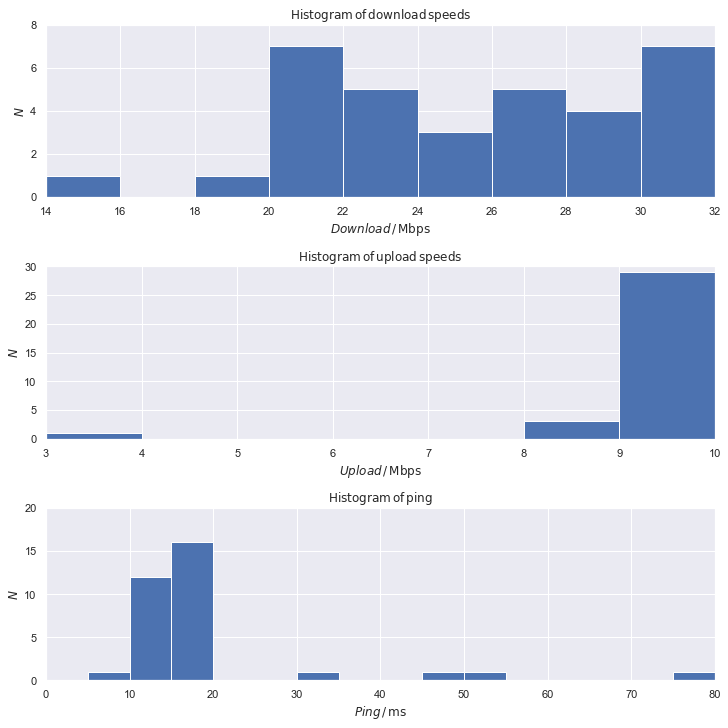

In [41]:
fig, axs = plt.subplots(3,1,figsize=(10,10), constrained_layout = True)
sns.set(style='darkgrid')

axs[0].hist(d_speed, [i for i in range(14,40,2)])
axs[0].set_xlim(14,32)
axs[0].set_ylim(0,8)
axs[0].set_title(r'$\mathrm{Histogram\,of\,download\,speeds}$')
axs[0].set_xlabel(r'$Download\,\mathrm{/\,Mbps}$')
axs[0].set_ylabel(r'$N$')

axs[1].hist(u_speed, [i for i in range(3,11)])
axs[1].set_xlim(3,10)
axs[1].set_ylim(0,30)
axs[1].set_title(r'$\mathrm{Histogram\,of\,upload\,speeds}$')
axs[1].set_xlabel(r'$Upload\,\mathrm{/\,Mbps}$')
axs[1].set_ylabel(r'$N$')


axs[2].hist(ping, [i for i in range(5,81,5)])
axs[2].set_xlim(0,80)
axs[2].set_ylim(0,20)
axs[2].set_title(r'$\mathrm{Histogram\,of\,ping}$')
axs[2].set_xlabel(r'$Ping\,\mathrm{/\,ms}$')
axs[2].set_ylabel(r'$N$')

plt.show()